# DATA2001 Assignment 3
## Timeseries Data Analysis
### Jamie Katsamatsas s4674720
### 27/10/22
    
Questions
    
- Can include other datasets with US dollar values or US GDP values and merge them into the dataset
- Is MA5 or MA10 better for rolling averages??
- Are my drops in AIC and BIC small enough for arima??

#### Dataset Columns
- Date: Date of trades
- Open: Opening price, price of first trade of the day
- High: Highest price of all trades of the day
- Low: Lowest price of all trades of the day
- Close: Closing price, price of last trade before the end of day
- Volume: Total number of stocks traded during the day
- OpenInt: Open interest, the total number of outstanding derivative contracts, such as options or futures, that have not been settled for an asset at the end of day.

# Task 1 - Data Preparation
Read the dataset using the “pandas” library and set up the index in an appropriate way for timeseries analysis. Can you identify any useful side data or exogenous variables? If so, include them into your dataframe and handle/merge them in an appropriate way. Explain how you did it along with a justification for your choices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
amazon_data = pd.read_csv("amzn.us.csv")
amazon_data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...,...
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


In [3]:
# Rename "Date" to "Datetime"
amazon_data.rename(columns = {'Date': 'Datetime'}, inplace=True)

# set index to datetime
amazon_data = amazon_data.set_index('Datetime')

# cast "Date" to "Datetime"
amazon_data.index = amazon_data.index.astype('datetime64[ns]')

In [4]:
amazon_data.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28',
               '1997-05-29', '1997-05-30',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Datetime', length=5153, freq=None)

In [5]:
amazon_data.head()

,Open,High,Low,Close,Volume,OpenInt
Datetime,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0


In [6]:
# https://www.investopedia.com/terms/p/percentage-change.asp
amazon_data["Change"] = amazon_data["Close"] - amazon_data["Open"]
amazon_data["%Change"] = amazon_data["Change"] / amazon_data["Open"]
amazon_data

,Open,High,Low,Close,Volume,OpenInt,Change,%Change
Datetime,,,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0,-0.24,-0.121827
1997-05-19,1.76,1.77,1.62,1.71,6106800,0,-0.05,-0.028409
1997-05-20,1.73,1.75,1.64,1.64,5467200,0,-0.09,-0.052023
1997-05-21,1.64,1.65,1.38,1.43,18853200,0,-0.21,-0.128049
1997-05-22,1.44,1.45,1.31,1.40,11776800,0,-0.04,-0.027778
...,...,...,...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,11.51,0.010377
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,-1.57,-0.001396
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,10.06,0.008960


In [7]:
amazon_data.describe

<bound method NDFrame.describe of                Open     High      Low    Close    Volume  OpenInt  Change  \
Datetime                                                                    
1997-05-16     1.97     1.98     1.71     1.73  14700000        0   -0.24   
1997-05-19     1.76     1.77     1.62     1.71   6106800        0   -0.05   
1997-05-20     1.73     1.75     1.64     1.64   5467200        0   -0.09   
1997-05-21     1.64     1.65     1.38     1.43  18853200        0   -0.21   
1997-05-22     1.44     1.45     1.31     1.40  11776800        0   -0.04   
...             ...      ...      ...      ...       ...      ...     ...   
2017-11-06  1109.15  1125.41  1108.77  1120.66   3331738        0   11.51   
2017-11-07  1124.74  1130.60  1117.50  1123.17   2684443        0   -1.57   
2017-11-08  1122.82  1135.54  1119.11  1132.88   2576010        0   10.06   
2017-11-09  1125.96  1129.62  1115.77  1129.13   3729978        0    3.17   
2017-11-10  1126.10  1131.75  1124.06  112

# Task 2 - Exploratory Data Analysis
Visualise the entire data set, and comment on the patterns you can observe with respect to the features discussed in the lectures. Include visualisations appropriate for uncertainty and correlation where appropriate.

TODO
- Focus on visualise entire dataset, can visualise some shorter periods but the main focus is on all the data
- Visualise the candlestick plot in a grid with different value aggregations
- Plot all values in the dataset, can comment on that all the values result in similar plots

In [8]:
amazon_data['year'] = amazon_data.index.year
amazon_data['month'] = amazon_data.index.month_name()
amazon_data['day'] = amazon_data.index.day_name()
amazon_data['day'].head()

Datetime
1997-05-16       Friday
1997-05-19       Monday
1997-05-20      Tuesday
1997-05-21    Wednesday
1997-05-22     Thursday
Name: day, dtype: object

Cut dataset so starts with monday

In [9]:
# amazon_data = amazon_data[1:].copy()

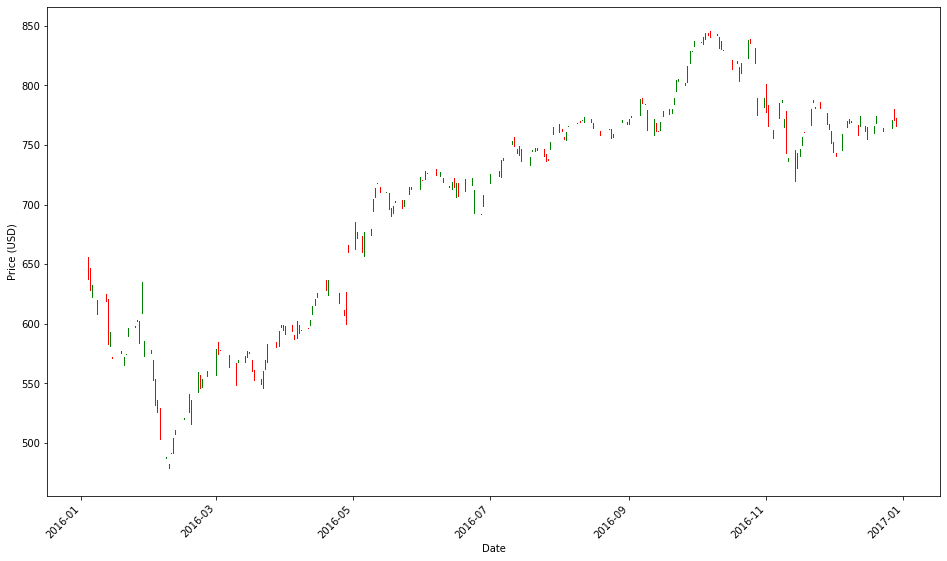

In [10]:
# https://www.statology.org/matplotlib-python-candlestick-chart/

time_period_start = "2016-01-01"
time_period_end = "2017-01-01"

amazon_data_chunk = amazon_data[time_period_start:time_period_end]

plt.figure(figsize=(16,9))

width = 0.4
width2 = 0.05

up = amazon_data_chunk[amazon_data_chunk['Close'] >= amazon_data_chunk['Open']]
down = amazon_data_chunk[amazon_data_chunk['Close'] < amazon_data_chunk['Open']]

# plt.plot(down.index, down["Close"], color='yellow')

# plot up prices
plt.bar(up.index, up["Close"] - up["Open"], width, bottom=up["Open"], color='green')
plt.bar(up.index, up["High"] - up["Close"], width2, bottom=up["Close"], color='green')
plt.bar(up.index, up["Low"] - up["Open"], width2, bottom=up["Open"], color='green')

# plot down prices
plt.bar(down.index, down["Close"] - down["Open"], width, bottom=down["Open"], color='red')
plt.bar(down.index, down['High'] - down["Open"], width2, bottom=down["Open"], color='red')
plt.bar(down.index, down["Low"] - down["Close"], width2, bottom=down["Close"], color='red')

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Price (USD)')

#display candlestick chart
plt.show()

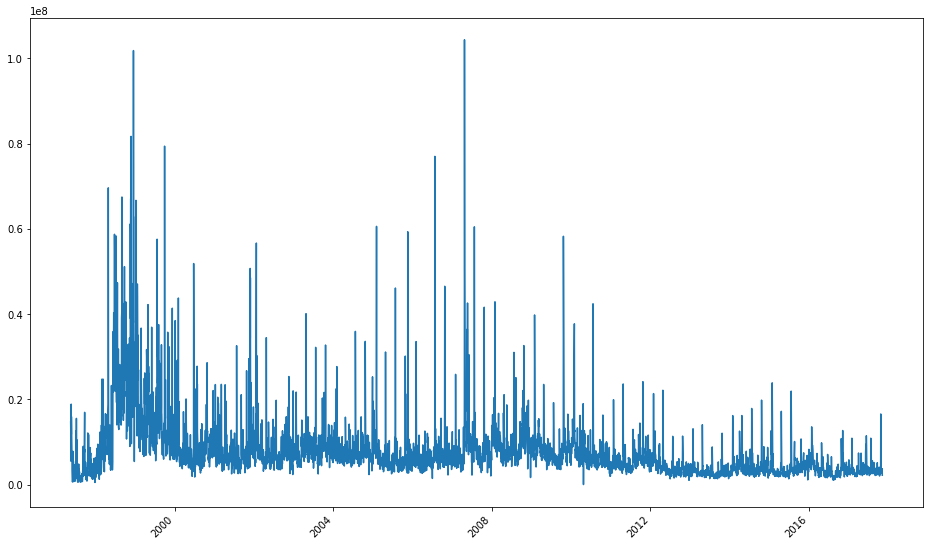

In [11]:
# plot Volume
plt.figure(figsize=(16,9))

plt.plot(amazon_data.index, amazon_data["Volume"])

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

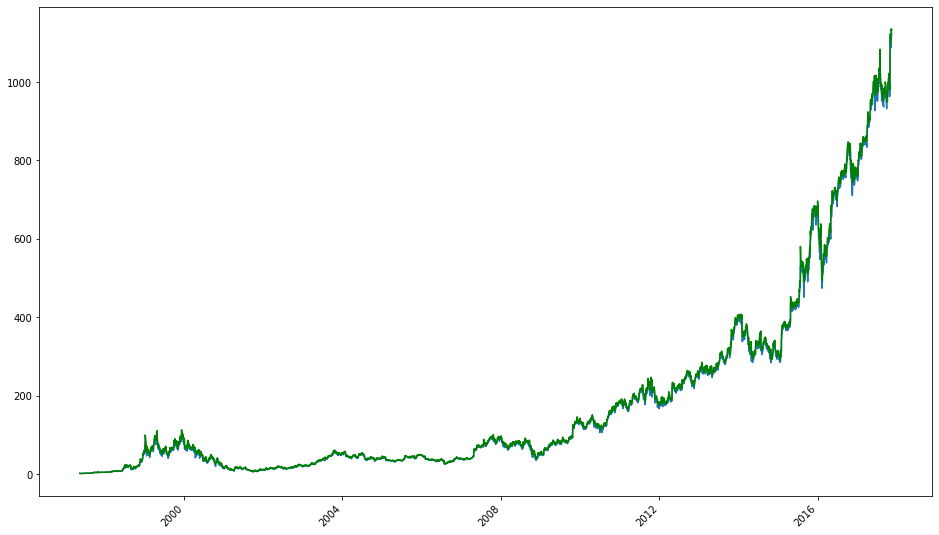

In [12]:
# plot Low, High
plt.figure(figsize=(16,9))

plt.plot(amazon_data.index, amazon_data["Low"])
plt.plot(amazon_data.index, amazon_data["High"], 'green')

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

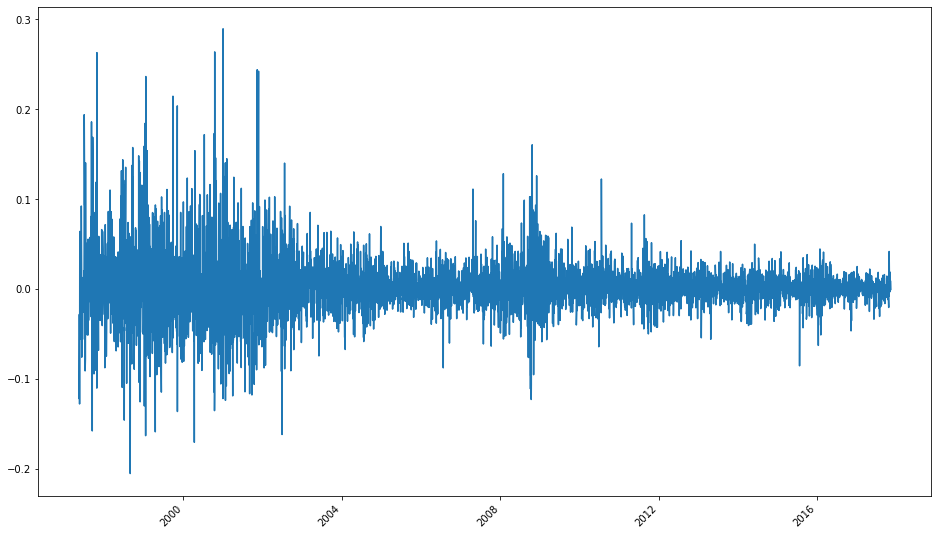

In [13]:
# plot %change
plt.figure(figsize=(16,9))

plt.plot(amazon_data.index, amazon_data["%Change"])

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

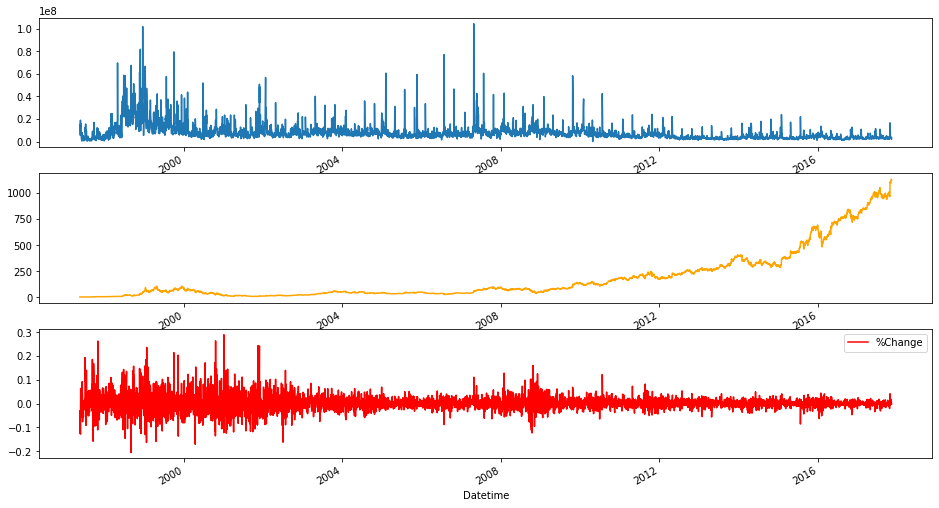

In [14]:
# Plot volume
fig, ax = plt.subplots(3)
amazon_data["Volume"].plot(label='Volume', ax=ax[0])
amazon_data["Close"].plot(color='orange', label='Close', ax=ax[1])
amazon_data["%Change"].plot(color='red', label='%Change', ax=ax[2])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

Text(0, 0.5, 'Volume')

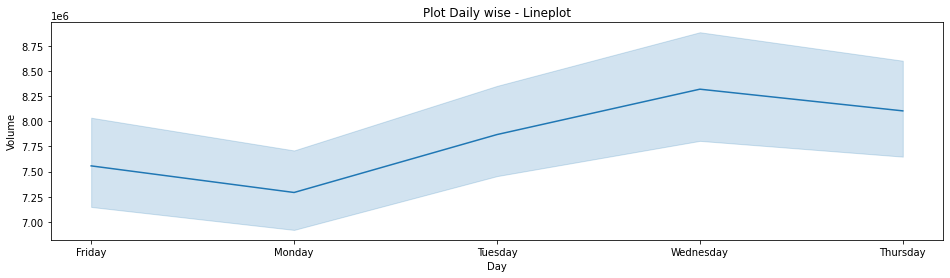

In [15]:
# lineplot from  seaborn package shows the trend-line along with the confidence intervals (i.e. variation of data at each time point)
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.lineplot(data=amazon_data, x='day', y=amazon_data['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot Daily wise - Lineplot")
axes[0,0].set_xlabel('Day')
axes[0,0].set_ylabel('Volume')

Text(0, 0.5, 'Volume')

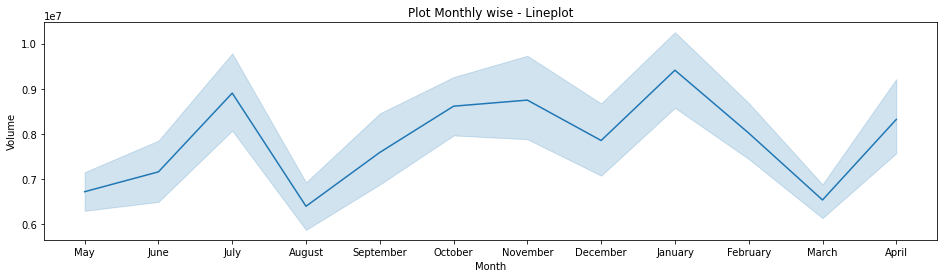

In [16]:
# lineplot from  seaborn package shows the trend-line along with the confidence intervals (i.e. variation of data at each time point)
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.lineplot(data=amazon_data, x='month', y=amazon_data['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot Monthly wise - Lineplot")
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Volume')

Text(0, 0.5, 'Volume')

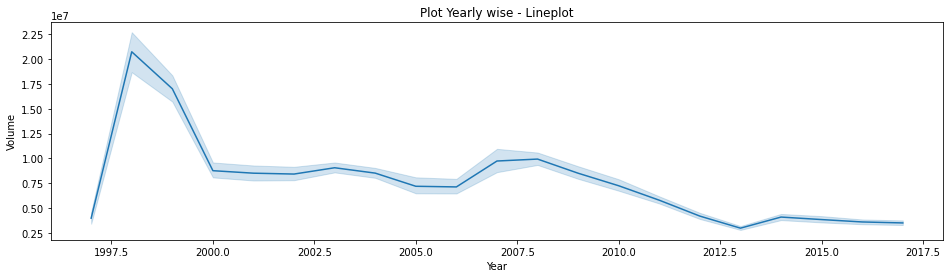

In [17]:
# lineplot from  seaborn package shows the trend-line along with the confidence intervals (i.e. variation of data at each time point)
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.lineplot(data=amazon_data, x='year', y=amazon_data['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot Yearly wise - Lineplot")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Volume')

Text(0, 0.5, 'Volume')

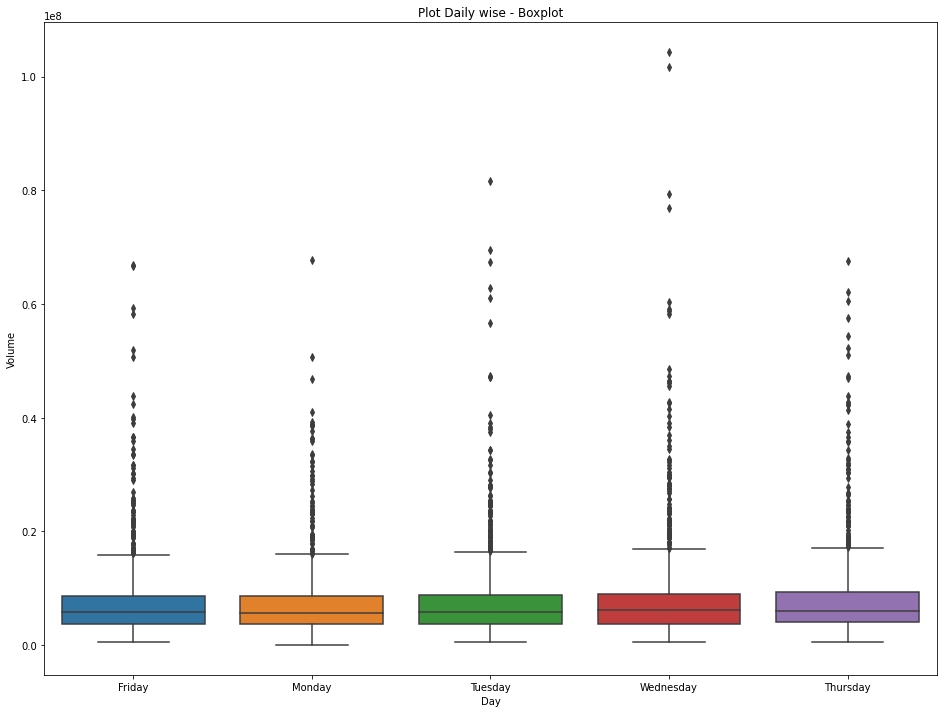

In [18]:
# Boxplot to view daily volume 
fig, ax = plt.subplots(figsize=(16,12))
sns.boxplot(data=amazon_data, x='day', y=amazon_data['Volume'], ax = ax)
ax.set_title("Plot Daily wise - Boxplot")
ax.set_xlabel('Day')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

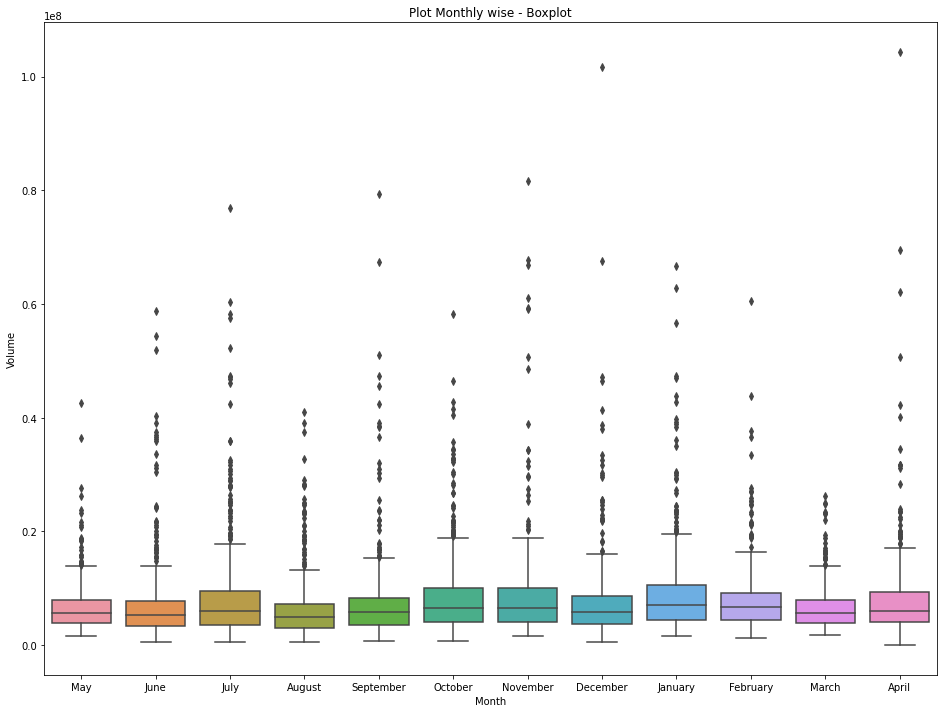

In [19]:
# Boxplot to view monthly volume 
fig, ax = plt.subplots(figsize=(16,12))
sns.boxplot(data=amazon_data, x='month', y=amazon_data['Volume'], ax = ax)
ax.set_title("Plot Monthly wise - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

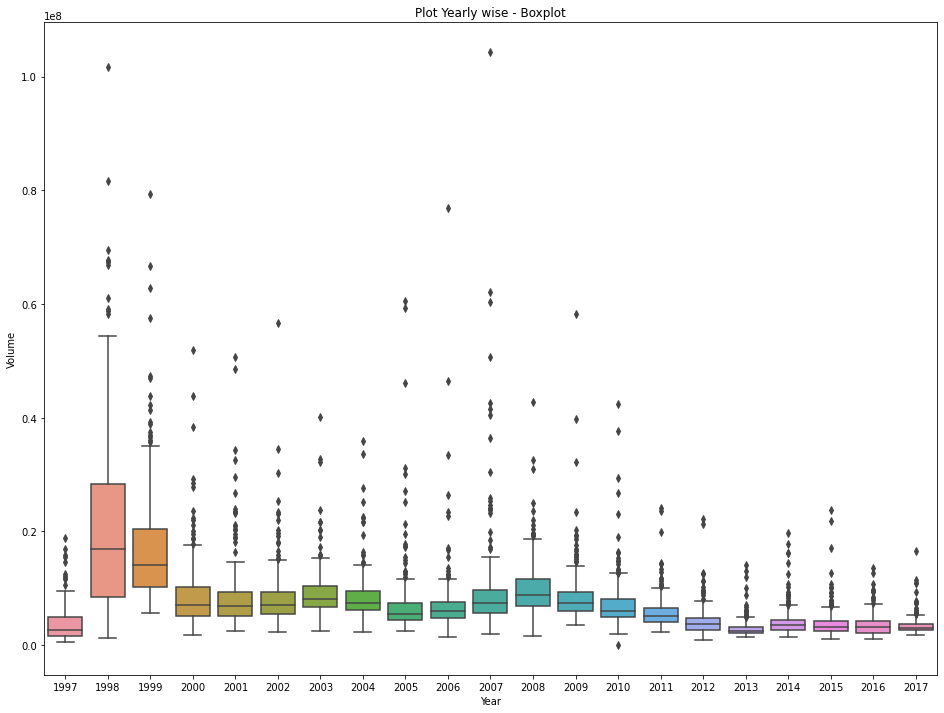

In [20]:
# Boxplot to view yearly volume 
fig, ax = plt.subplots(figsize=(16,12))
sns.boxplot(data=amazon_data, x='year', y=amazon_data['Volume'], ax = ax)
ax.set_title("Plot Yearly wise - Boxplot")
ax.set_xlabel('Year')
ax.set_ylabel('Volume')

# Task 3 - AMZN STR Decomposition
Focus now on the AMZN stock volume time series.

a) Split the data into training and testing series, selecting the testing series to be the last three months of the data.

b) Manually step through the STR decomposition process on the training data, as
described in the course material. Visualise and interpret each of the components of the STR decomposition for volume. (Hint: You may wish to validate the output of your manual process against an automated modelling approach.)

In [21]:
# # Remove all data besides stock volume data
# amazon_data.drop(amazon_data.columns.difference(['Datetime', 'Volume']), axis=1, inplace=True)

div = 5 * 4 * 3 # 5 days a week * 4 weeks a month * 3 months
train_amazon = amazon_data['Volume'][:-div]
test_amazon = amazon_data['Volume'][-div:]
prediction_dates = pd.DataFrame(index=test_amazon.index)

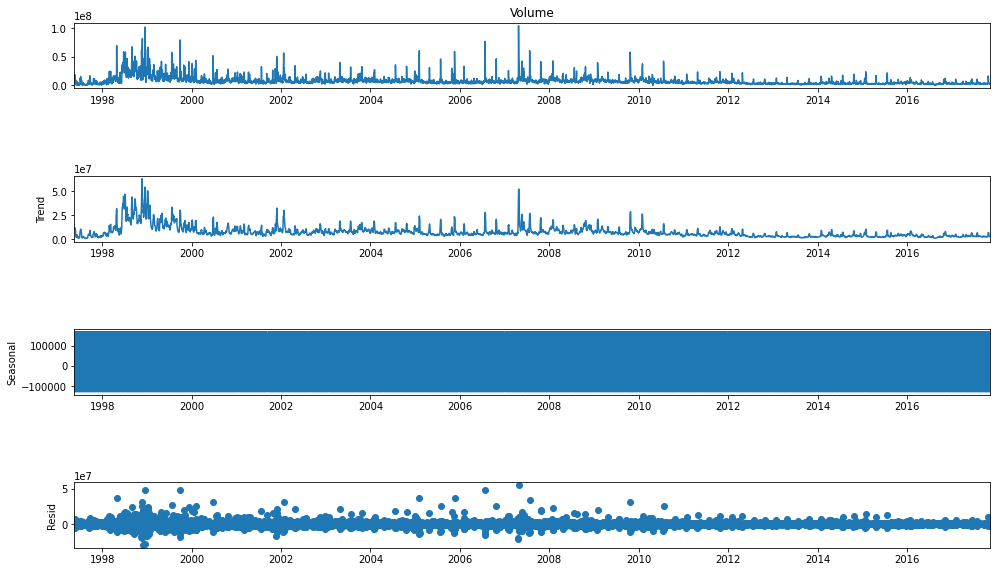

In [22]:
# Jumping ahead - automatic decomposition of temp
from statsmodels.tsa.seasonal import seasonal_decompose

str_res = seasonal_decompose(amazon_data['Volume'],period = (5))
fig = str_res.plot()
fig.set_size_inches((16, 9))

### Isolate Trend
Since we have a weekly cycle we can roll to 1 and 2 weeks and look at the plot

In [23]:
amazon_data['MA5 Trend'] = amazon_data['Volume'].rolling(5).mean() # 1 week
amazon_data['MA10 Trend'] = amazon_data['Volume'].rolling(10).mean() # 2 week
amazon_data['MA20 Trend'] = amazon_data['Volume'].rolling(20).mean() # 1 month
amazon_data['MA60 Trend'] = amazon_data['Volume'].rolling(60).mean() # 3 months
amazon_data['MA120 Trend'] = amazon_data['Volume'].rolling(120).mean() # 6 months
amazon_data['MA180 Trend'] = amazon_data['Volume'].rolling(180).mean() # 9 months
amazon_data['MA240 Trend'] = amazon_data['Volume'].rolling(240).mean() # 12 months
amazon_data['MA480 Trend'] = amazon_data['Volume'].rolling(480).mean() # 24 months
amazon_data['MA720 Trend'] = amazon_data['Volume'].rolling(720).mean() # 36 months

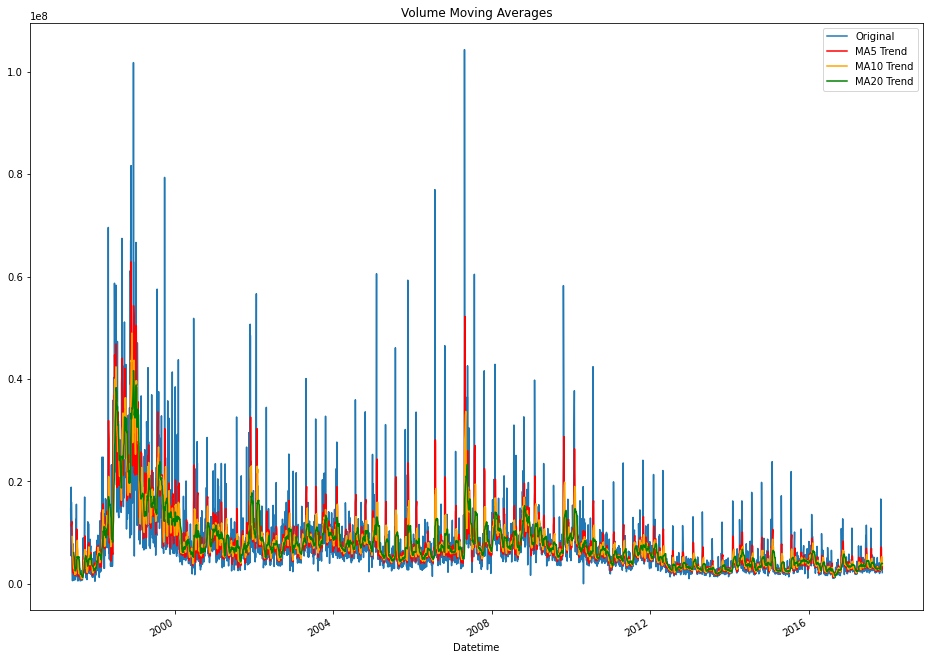

In [24]:
fig, ax = plt.subplots()
amazon_data['Volume'].plot(label='Original', ax=ax)
amazon_data['MA5 Trend'].plot(color='red', label='MA5 Trend', ax=ax)
amazon_data['MA10 Trend'].plot(color='orange', label='MA10 Trend', ax=ax)
amazon_data['MA20 Trend'].plot(color='green', label='MA20 Trend', ax=ax)
# amazon_data['MA60 Trend'].plot(color='orange', label='MA60 Trend', ax=ax)
# amazon_data['MA120 Trend'].plot(color='blue', label='MA60 Trend', ax=ax)
# amazon_data['MA180 Trend'].plot(color='yellow', label='MA60 Trend', ax=ax) # chosen in tut
# amazon_data['MA240 Trend'].plot(color='yellow', label='MA60 Trend', ax=ax)
# amazon_data['MA480 Trend'].plot(color='yellow', label='MA60 Trend', ax=ax)
# amazon_data['MA720 Trend'].plot(color='yellow', label='MA60 Trend', ax=ax)
plt.title('Volume Moving Averages')
fig.set_size_inches((16, 12))
plt.legend()
plt.show()

<AxesSubplot:xlabel='Datetime'>

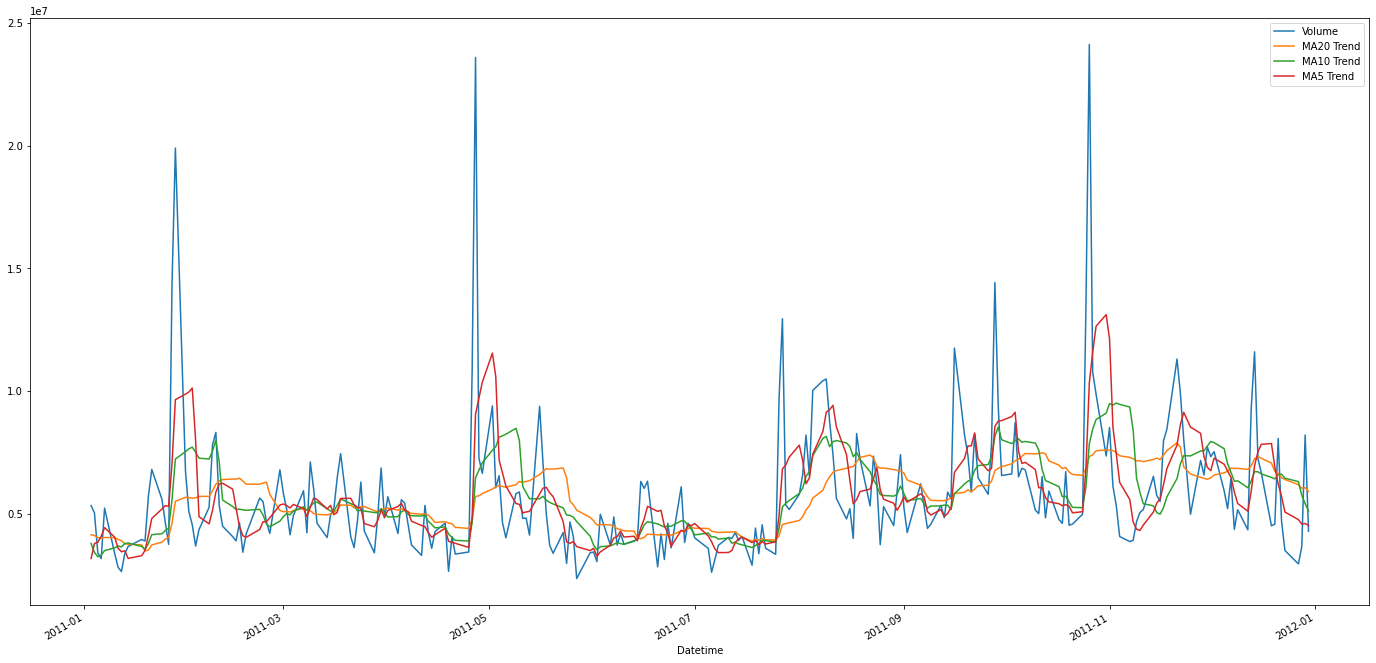

In [25]:
amazon_data['2011':'2011'][['Volume', 'MA20 Trend', 'MA10 Trend', 'MA5 Trend']].plot(figsize=(24,12))

<AxesSubplot:xlabel='Datetime'>

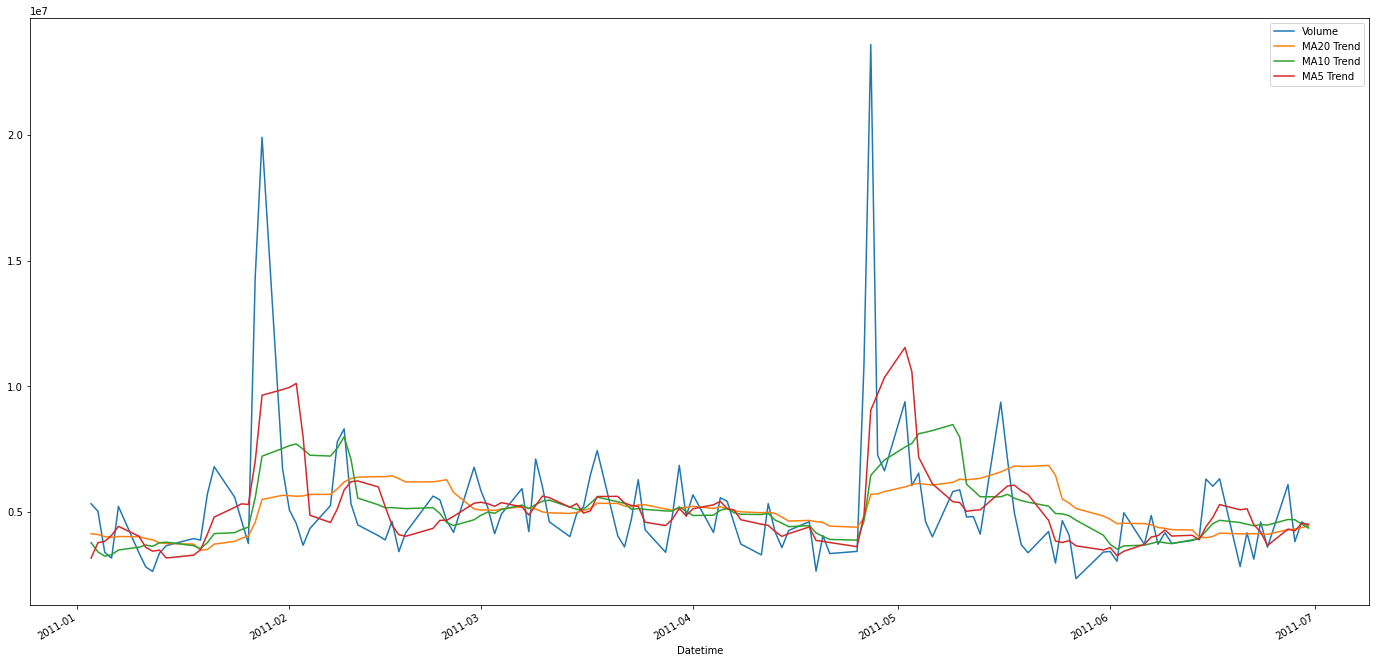

In [26]:
amazon_data['2011-01':'2011-06'][['Volume', 'MA20 Trend', 'MA10 Trend', 'MA5 Trend']].plot(figsize=(24,12))

Go with MA-5 shows a pattern but its not seasonality??

In [27]:
rolling_period = 'MA5 Trend'

### Detrend the Series

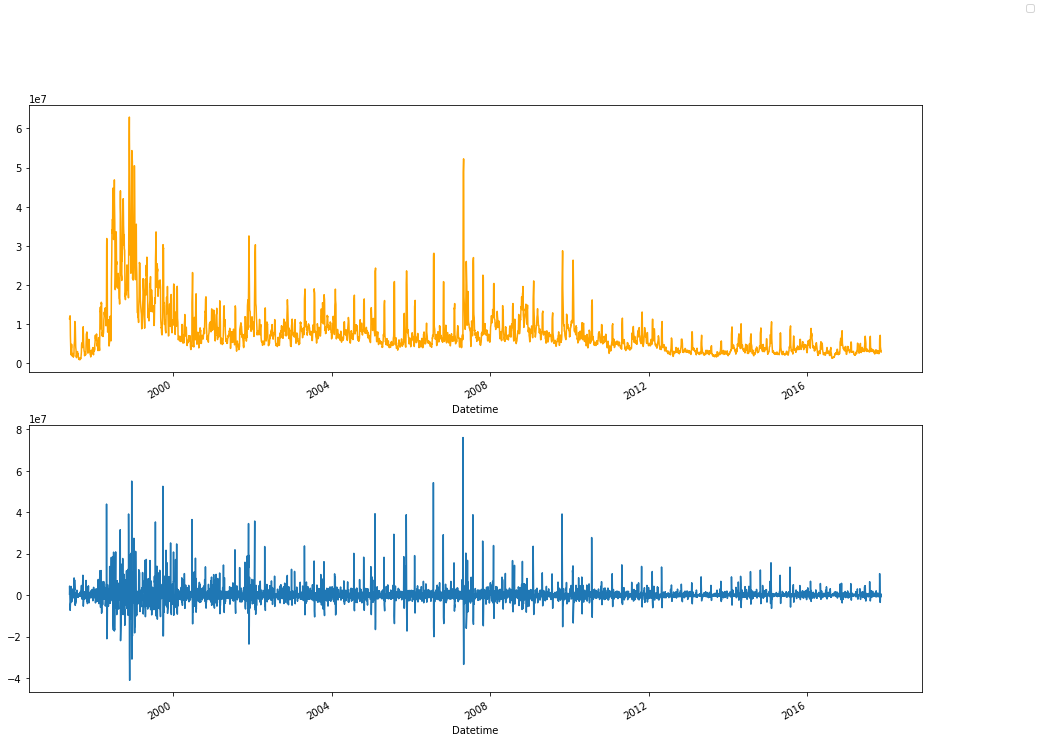

In [28]:
# De-trended data
amazon_data['De-trended'] = amazon_data['Volume'] - amazon_data[rolling_period]

fig, ax = plt.subplots(2)
amazon_data[rolling_period].plot(color='orange', label=rolling_period, ax=ax[0])
amazon_data['De-trended'].plot(label='De-trended', ax=ax[1])
fig.set_size_inches((16, 12))
fig.legend([])
plt.show()

### Estimate seasonal component

<AxesSubplot:xlabel='Datetime'>

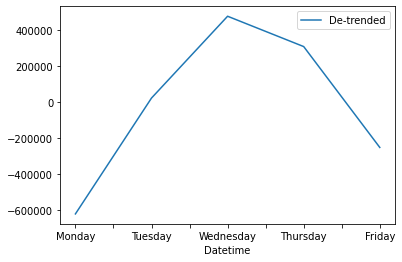

In [29]:
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html
# https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/
# https://stackoverflow.com/questions/40427943/how-do-i-change-a-single-index-value-in-pandas-dataframe
raw_daily_means = amazon_data.groupby(amazon_data.index.dayofweek)['De-trended'].mean()
raw_daily_means = raw_daily_means.to_frame()
raw_daily_means = raw_daily_means.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday'})
raw_daily_means.plot()

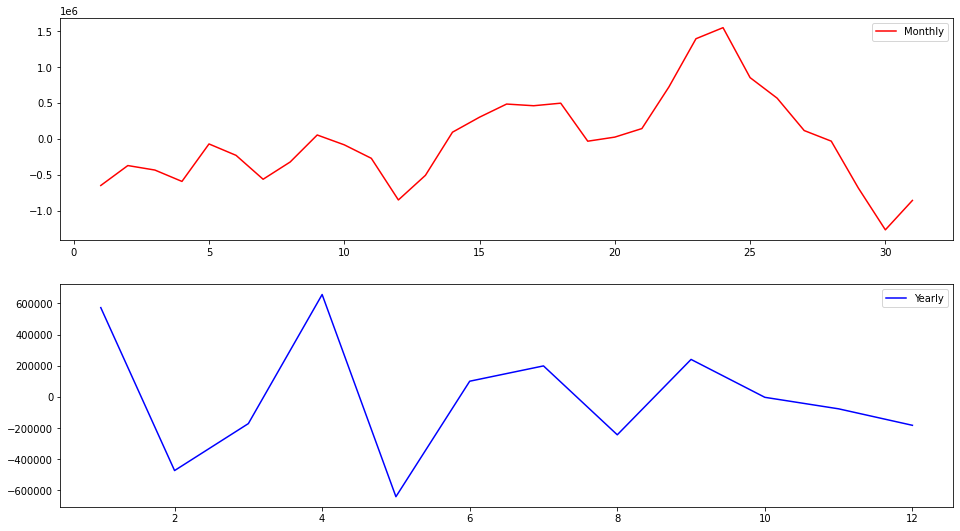

In [30]:
# Test seasonal component for monthly data
raw_monthly_means = amazon_data.groupby(amazon_data.index.day)['De-trended'].mean()
raw_yearly_means = amazon_data.groupby(amazon_data.index.month)['De-trended'].mean()

fig, (ax1, ax2) = plt.subplots(2)
# raw_monthly_means.plot(ax=ax[0], color='orange')
# raw_yearly_means.plot(ax=ax[1])
fig.set_size_inches((16, 9))

ax1.plot(raw_monthly_means, color='r', label='Monthly')
ax1.legend(loc='upper right')
ax2.plot(raw_yearly_means, color='b', label='Yearly')
ax2.legend(loc='upper right')

In [31]:
print(type(fig))

<class 'matplotlib.figure.Figure'>


In [32]:
season_length = len(raw_daily_means.index)

Seasonal Components need to sum to zero, we will introduce an adjustment

In [33]:
# Shift values so that seasonal components sum to zero
adjustment = raw_daily_means.sum()/season_length
daily_means = raw_daily_means - adjustment

# daily_means.plot()
# print(type(daily_means))

# Convert df to series
daily_means = daily_means.squeeze()

Now we fill the series for the entire duration of the timeseries
1. Get the lenth of the seasonal data input equal to the length of df_temp
2. Start the seasonal data at the correct time step

In [34]:
# tile the values into the dataframe so that the entire series is filled
seasonal = np.tile(daily_means,int(np.floor(len(amazon_data)/season_length)))

print(f"seasonal length = {len(seasonal)}  amazon_data = {len(amazon_data)}")

seasonal length = 5150  amazon_data = 5153


In [35]:
# # tile the values into the dataframe so that the entire series is filled
# seasonal = np.tile(daily_means,int(np.floor(len(amazon_data)/season_length)))
# used typeout to check lengths:
# len(seasonal), len(df_temp)
# These are not the same so go back to check start time of series - 11PM!! - which explains the extra observation. 
# Prepending one observation
seasonal = np.insert(seasonal, 0, daily_means[season_length - 1])

# TEMP add 2 values to end of dataframe
seasonal = np.insert(seasonal, len(seasonal - 1), daily_means[0])
seasonal = np.insert(seasonal, len(seasonal - 1), daily_means[1])

amazon_data['temp-seasonal'] = seasonal

<AxesSubplot:xlabel='Datetime'>

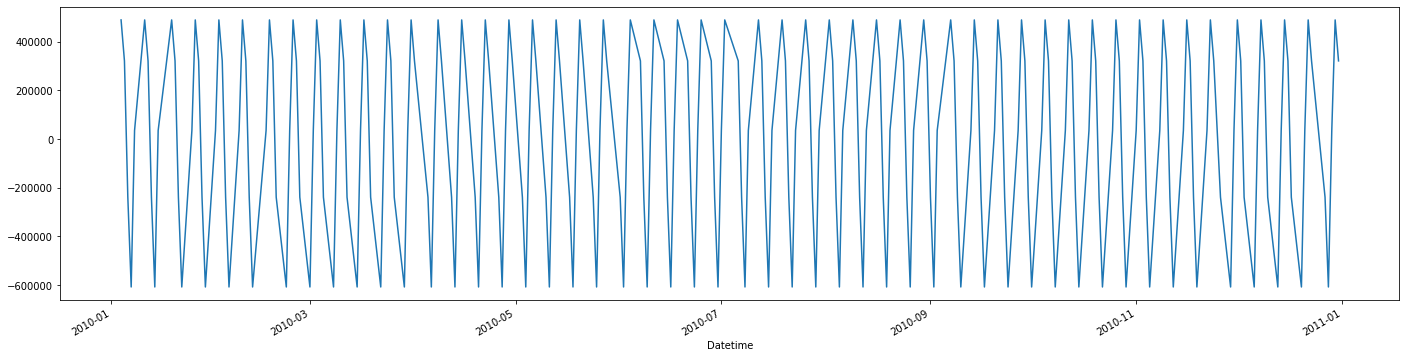

In [36]:
amazon_data['2010':'2010']['temp-seasonal'].plot(figsize=(24,6))

### Calculate the residual component
The last step is to calulate the residual, by subtracting the seasonal component from the detrended data.

<AxesSubplot:xlabel='Datetime'>

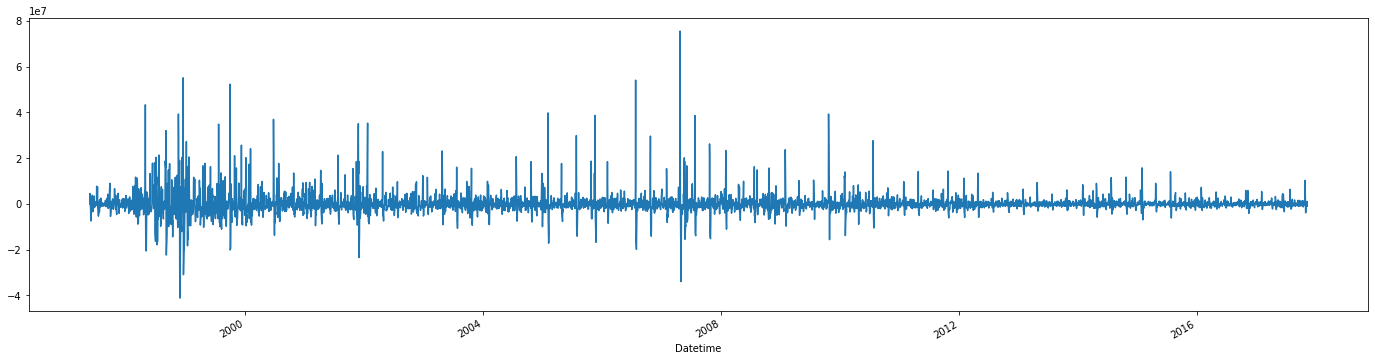

In [37]:
amazon_data['temp-residual'] = amazon_data['De-trended'] - amazon_data['temp-seasonal']
amazon_data['temp-residual'].plot(figsize=(24,6))

Putting all 4 plots into the same figure

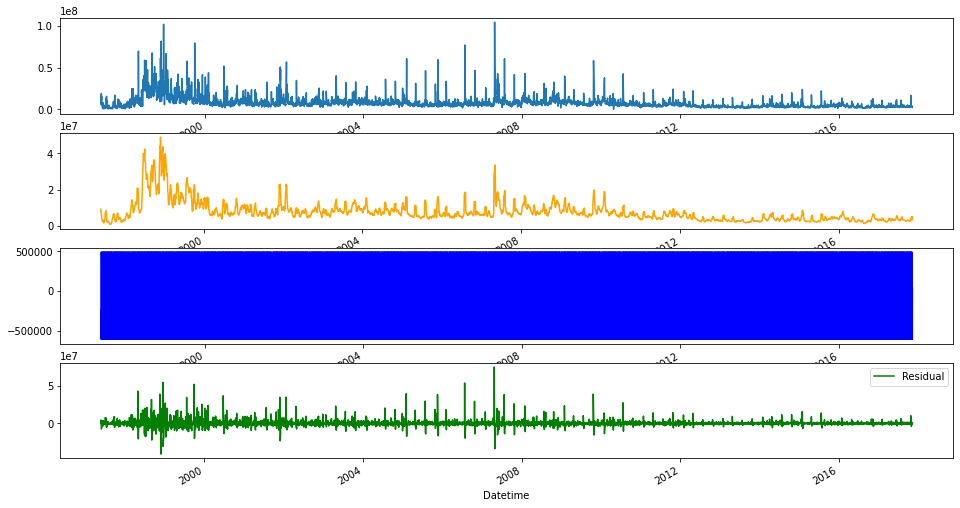

In [38]:
fig, ax_str = plt.subplots(4)
amazon_data['Volume'].plot(label='Original', ax=ax_str[0])
amazon_data['MA10 Trend'].plot(color='orange', label='MA10 Trend', ax=ax_str[1])
amazon_data['temp-seasonal'].plot(color='blue', label='Seasonal', ax=ax_str[2])
amazon_data['temp-residual'].plot(color='green', label= 'Residual', ax=ax_str[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

Looking closer at one month

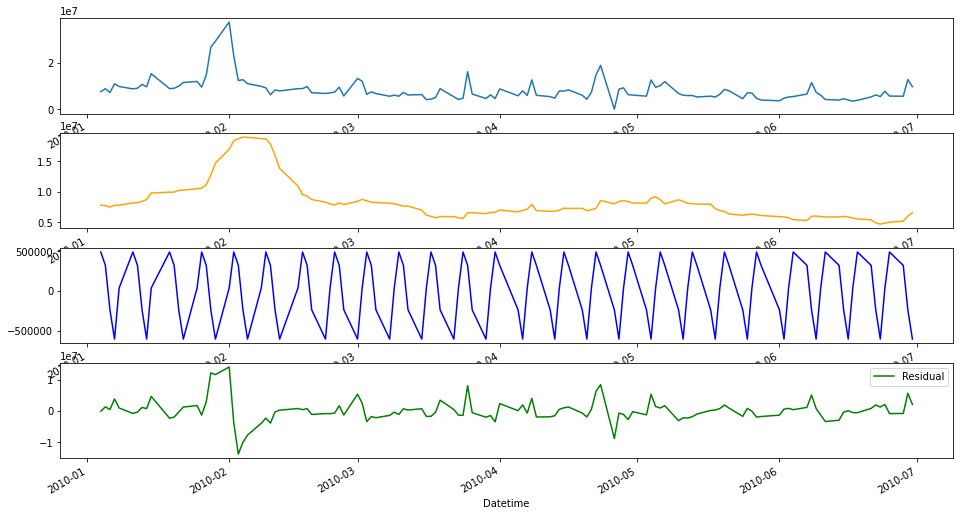

In [39]:
fig, ax_str = plt.subplots(4)
amazon_data['Volume']["2010-01":"2010-06"].plot(label='Original', ax=ax_str[0])
amazon_data['MA10 Trend']["2010-01":"2010-06"].plot(color='orange', label='MA10 Trend', ax=ax_str[1])
amazon_data['temp-seasonal']["2010-01":"2010-06"].plot(color='blue', label='Seasonal', ax=ax_str[2])
amazon_data['temp-residual']["2010-01":"2010-06"].plot(color='green', label= 'Residual', ax=ax_str[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

# Task 4 - Timeseries Models
a) Fit an ARIMA model for the trend-cycle component of your STR decomposition of the training data and interpret the estimated model parameters.

b) Using the STR components that you estimated in tasks 3 and 4, produce forecasts of AMZN stock volumes for the test data series. Include the uncertainty in the forecasts and visualise the predictions.

### Check for stationarity
To fig an autoregressive model or an ARIMA model that contains an AR component, the data must be stationary. The criteria for stationarity is that the data is:
- roughly horizontal
- constant variance
- no patterns predictable in the long-term

<AxesSubplot:xlabel='Datetime'>

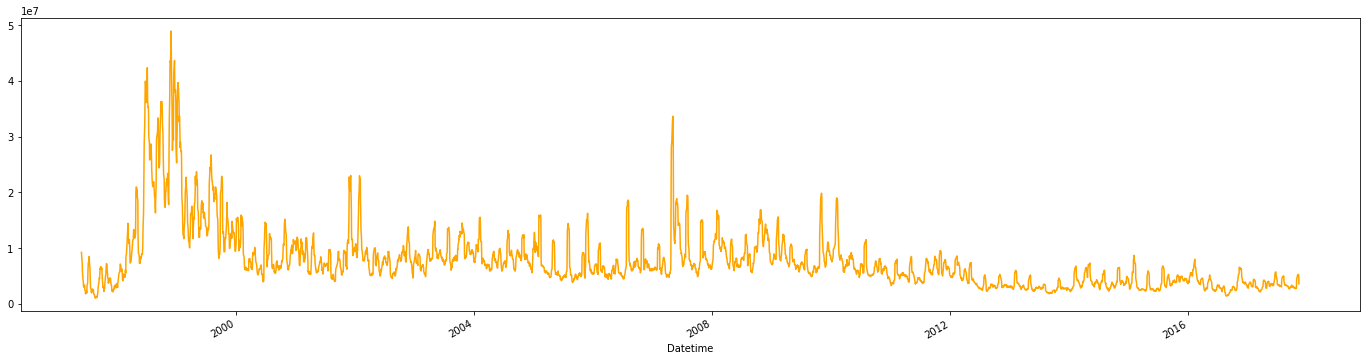

In [40]:
amazon_data['MA10 Trend'].plot(color='orange', figsize=(24,6))

Perform first differencing 

<AxesSubplot:xlabel='Datetime'>

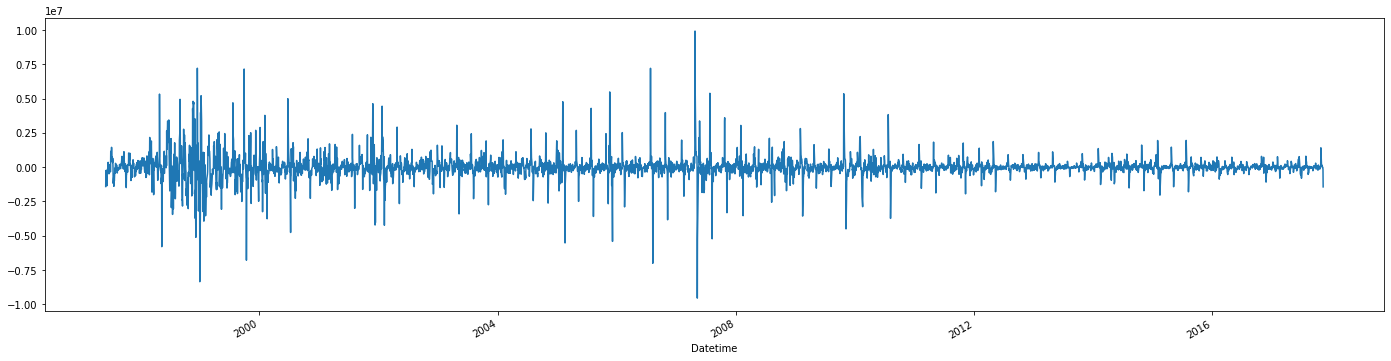

In [41]:
trend_d1 = amazon_data['MA10 Trend'].diff()
trend_d1.plot(figsize=(24,6))

<AxesSubplot:xlabel='Datetime'>

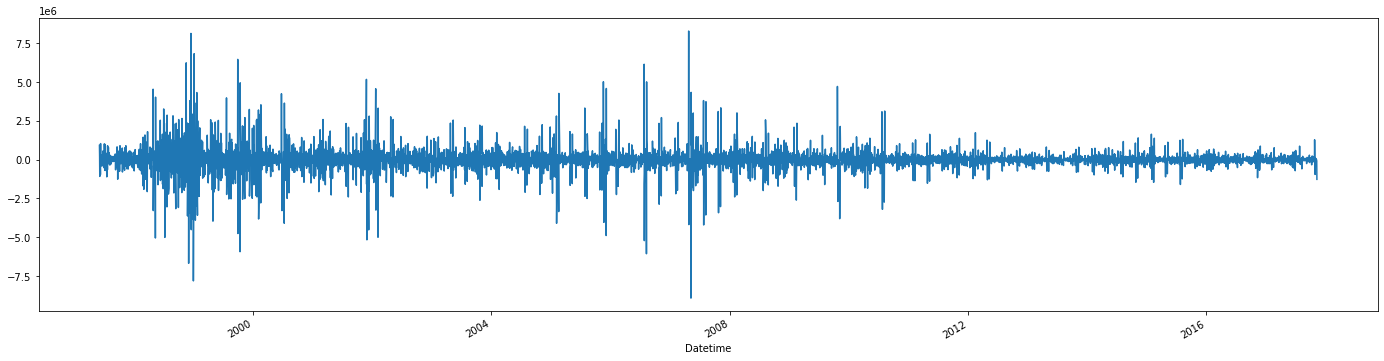

In [42]:
trend_d2 = trend_d1.diff()
trend_d2.plot(figsize=(24,6))

The differencing plot does not seem to change when going from first to second differencing. Therefore, we will select the first differencing. 

d = 1

## Fit a lower order model

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

## Is there Evidence of autocorrelation?

In [44]:
# trim th nan's from the differenced trend
trend_d1 = trend_d1[10:].copy()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


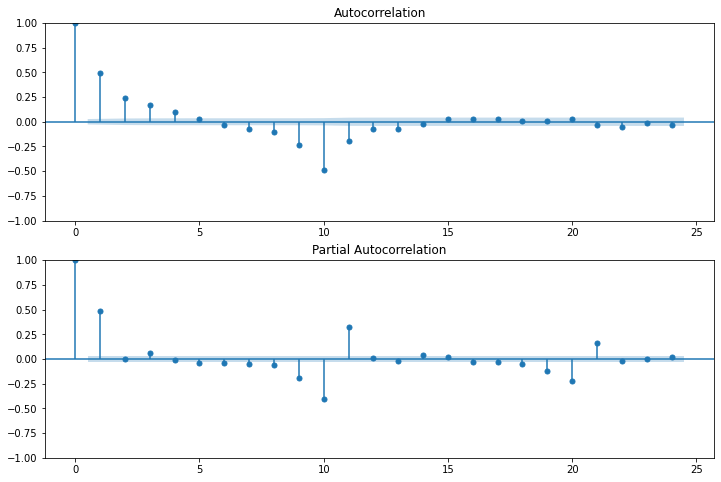

In [45]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d1, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d1, lags=24, ax=ax2)

### Fit the ARIMA Model

In [46]:
arima_1_1_0 = ARIMA(amazon_data[rolling_period][:-div], order=(1, 1, 0)).fit()
print(arima_1_1_0.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              MA5 Trend   No. Observations:                 5093
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -79219.897
Date:                Thu, 27 Oct 2022   AIC                         158443.795
Time:                        07:41:11   BIC                         158456.866
Sample:                             0   HQIC                        158448.372
                               - 5093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4804      0.006     75.409      0.000       0.468       0.493
sigma2      1.942e+12   1.23e-15   1.58e+27      0.000    1.94e+12    1.94e+12
Ljung-Box (L1) (Q):                   3.94   Jarque-

In [47]:
arima_2_1_0 = ARIMA(amazon_data[rolling_period][:-div], order=(2, 1, 0)).fit()
print(arima_2_1_0.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              MA5 Trend   No. Observations:                 5093
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -79210.860
Date:                Thu, 27 Oct 2022   AIC                         158427.721
Time:                        07:41:11   BIC                         158447.327
Sample:                             0   HQIC                        158434.586
                               - 5093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5090      0.008     67.000      0.000       0.494       0.524
ar.L2         -0.0595      0.007     -7.957      0.000      -0.074      -0.045
sigma2      1.935e+12    3.1e-15   6.24e+26      0.0

### Comparing Goodness of fit of ARIMA models

Looking at the outputs: 
- AIC for ARIMA(1,1,0) = 158443, for ARIMA(2,1,0) = 158427
- BIC for ARIMA(1,1,0) = 158456, for ARIMA(2,1,0) = 158447
The drop in AIC and BIC is very small so therefore we will go with ARIMA(1,1,0)

Next we will see if ARIMA(1,1,1) gives us any improvements

In [48]:
arima_1_1_1 = ARIMA(amazon_data[rolling_period][:-div], order=(1, 1, 1)).fit()
print(arima_1_1_1.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              MA5 Trend   No. Observations:                 5093
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -79212.379
Date:                Thu, 27 Oct 2022   AIC                         158430.757
Time:                        07:41:12   BIC                         158450.363
Sample:                             0   HQIC                        158437.622
                               - 5093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.014     29.621      0.000       0.374       0.427
ma.L1          0.1044      0.015      6.760      0.000       0.074       0.135
sigma2      1.936e+12   3.78e-15   5.12e+26      0.0

Looking at the outputs: 
- AIC for ARIMA(1,1,0) = 158443, for ARIMA(1,1,1) = 158430
- BIC for ARIMA(1,1,0) = 158456, for ARIMA(1,1,1) = 158450
Again, the drop in AIC and BIC is very small so therefore we will go with ARIMA(1,1,0)

### Inspect the residuals

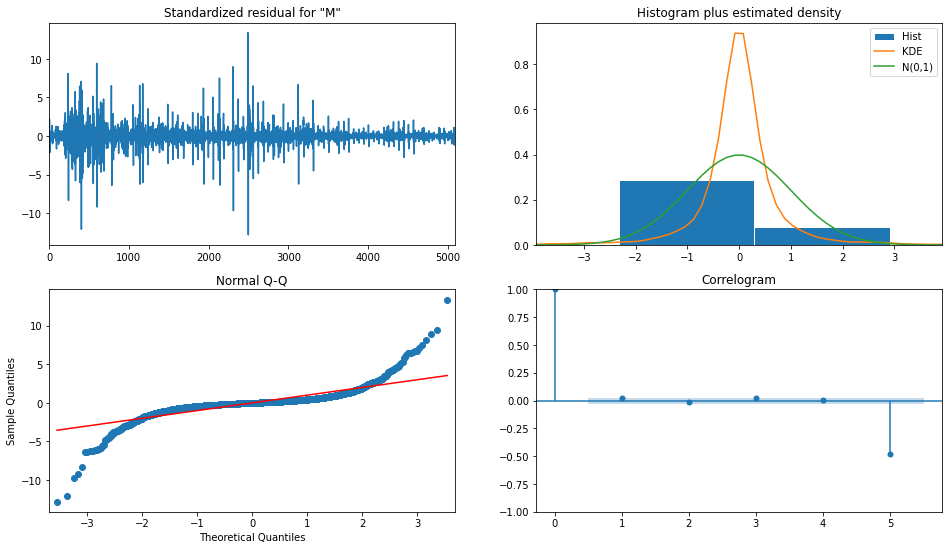

In [49]:
fig = plt.figure(figsize=(16, 9))
fig = arima_1_1_0.plot_diagnostics(fig=fig, lags=5)

In [50]:
# !pip install tensorflow

In [51]:
arima_pred = pd.DataFrame(index=test_amazon.index)

# print(test_amazon.index)
arima_pred['Trend'] = arima_1_1_0.predict(dates=prediction_dates)
# arima_pred['Trend'] = arima_1_1_0.predict(start='2017-08-18', end='2017-08-19')

DatetimeIndex(['2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31', '2017-09-01', '2017-09-05',
               '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-11',
               '2017-09-12', '2017-09-13', '2017-09-14', '2017-09-15',
               '2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21',
               '2017-09-22', '2017-09-25', '2017-09-26', '2017-09-27',
               '2017-09-28', '2017-09-29', '2017-10-02', '2017-10-03',
               '2017-10-04', '2017-10-05', '2017-10-06', '2017-10-09',
               '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
               '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19',
               '2017-10-20', '2017-10-23', '2017-10-24', '2017-10-25',
               '2017-10-26', '2017-10-27', '2017-10-30', '2017-10-31',
               '2017-11-01', '2017-11-02', '2017-11-03', '2017-11-06',
      

In [ ]:
arima_pred['Seasonal'] = ''
for t in range(len(arima_pred)):
    arima_pred['Seasonal'][t] = arima_pred['Trend'][t] + month_list[np.mod(t,12)]

# Task 5 - Pure Forcasters
now consider your choice of ML techniques

a) Select an appropriate pure forecasting method to predict the trend component of the volume training data.

b) Using the seasonal component that you estimated in task 3 and the pure forecaster from 5.a, produce forecasts of AMZN stock volumes for the test data series. Include the uncertainty in the forecasts, and visualise the predictions.

In [52]:
# !pip3 uninstall tensorflow-cpu -y
from tensorflow import keras

2022-10-27 07:41:13.756645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 07:41:14.131282: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 07:41:14.131358: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 07:41:14.195714: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 07:41:15.440638: W tensorflow/stream_executor/platform/de

# Task 6 - Model Evaluation
Evaluate the forecast performance of your model-based and pure forecasters using the test data and compare the two forecasters. Use appropriate evaluation metrics and methods. Discuss the similarities and difference between their performance and suggest possible avenues for improvement.